In [1]:
import argparse
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from keras import backend as K
from keras.layers import Input, Lambda, Conv2D
from keras.models import load_model, Model
from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes, scale_boxes
#from yad2k.utils.draw_boxes import draw_boxes
from yad2k.models.keras_yolo import yolo_head, yolo_boxes_to_corners, preprocess_true_boxes, yolo_loss, yolo_body, yolo_eval
from retrain_yolo import create_model
%matplotlib inline

F:\Anaconda3\envs\selfdrivingcar\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
sess = K.get_session()

In [3]:
class_names = read_classes("model_data/bottle_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")
image_shape = (480., 640.)    

In [4]:
yolo_model, model = create_model(anchors, class_names)

In [5]:
yolo_model.load_weights("model_data/yolo_bottle_weights.h5")

In [6]:
yolo_outputs = yolo_head(yolo_model.output, anchors, len(class_names))

In [7]:
boxes, scores, classes = yolo_eval(yolo_outputs, image_shape)

In [8]:
def predict(sess, image_file):
    """
    Runs the graph stored in "sess" to predict boxes for "image_file". Prints and plots the preditions.
    
    Arguments:
    sess -- your tensorflow/Keras session containing the YOLO graph
    image_file -- name of an image stored in the "images" folder.
    
    Returns:
    out_scores -- tensor of shape (None, ), scores of the predicted boxes
    out_boxes -- tensor of shape (None, 4), coordinates of the predicted boxes
    out_classes -- tensor of shape (None, ), class index of the predicted boxes
    
    Note: "None" actually represents the number of predicted boxes, it varies between 0 and max_boxes. 
    """

    # Preprocess your image
    image, image_data = preprocess_image("images/" + image_file, model_image_size = (416, 416))

    # Run the session with the correct tensors and choose the correct placeholders in the feed_dict.
    # You'll need to use feed_dict={yolo_model.input: ... , K.learning_phase(): 0})
    ### START CODE HERE ### (≈ 1 line)
    out_scores, out_boxes, out_classes = sess.run([scores, boxes, classes], feed_dict = {yolo_model.input:image_data, K.learning_phase():0})
    ### END CODE HERE ###

    # Print predictions info
    print('Found {} boxes for {}'.format(len(out_boxes), image_file))
    # Generate colors for drawing bounding boxes.
    colors = generate_colors(class_names)
    # Draw bounding boxes on the image file
    out_image = draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors)
    # Save the predicted bounding box on the image
#     image.save(os.path.join("out", image_file), quality=90)
    # Display the results in the notebook
#     output_image = scipy.misc.imread(os.path.join("out", image_file))
#     imshow(output_image)
    
    return out_image, out_scores, out_boxes, out_classes

In [9]:
out_image, out_scores, out_boxes, out_classes = predict(sess, "aquafina1.jpg")

Found 1 boxes for aquafina1.jpg
aquafina 1.00 (278, 54) (402, 451)


In [11]:
image, image_data = preprocess_image("images/aquafina1.jpg", model_image_size = (416, 416))

In [12]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

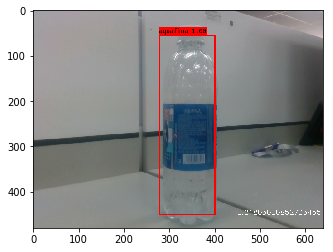

In [10]:
plt.imshow(out_image, interpolation='nearest')
plt.show()